In [ ]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#automatically categorize handlers, cutters, and flex by some formula of their data
#automatically categorize offense and defense players by some formula of their data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob

### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [14]:
#give file path abbreviation
poss_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [15]:
#give file path abbreviation
passes_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

### MERGE THE PASSES_DF WITH THE POSS_DF

In [19]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])
full_poss_df.to_csv('/Users/maxcohen/Documents/Blueprint Stats/BP_2019_Full_Possession_Data.csv')

In [49]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [116]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [130]:
full_poss_df['opponent'].unique()

array(['Lost  Boys', 'HIP', 'Vault', 'Big Wrench', 'Citywide', 'Shade',
       'Red Circus', 'El Nino', 'Floodwall', 'Lantern'], dtype=object)

In [118]:
opponent_grp = full_poss_df.groupby(['opponent'])

In [120]:
opponent_grp.get_group('Citywide')

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
494,2020-02-17 15:52:29,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
495,2020-02-17 15:52:33,2,1,Owen Marschall,Evan Ma,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
496,2020-02-17 15:52:41,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
497,2020-02-17 15:52:50,2,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
498,2020-02-17 15:52:54,2,1,Max Cohen,Ian McInerney,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2020-02-17 16:24:23,19,1,Victor Kao,Nadav Pearl,0,0,0,0,0,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
579,2020-02-17 16:24:27,19,1,Nadav Pearl,Josh Imhoff,0,0,0,1,1,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
580,2020-02-17 16:25:52,20,1,Ruozhou Ye,Jesse Gan,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN
581,2020-02-17 16:25:54,20,1,Jesse Gan,Geo Zheng,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN


In [133]:
opponent_grp['Receiver'].value_counts(normalize=True).head(300).loc['Red Circus']

Receiver
Victor Kao        0.179487
Max Cohen         0.170940
Carter Thallon    0.102564
Eliot Bemis       0.076923
Sam Pollack       0.076923
Jeff Voss         0.051282
Owen Marschall    0.051282
Andrew Edelman    0.042735
Geo Zheng         0.042735
Gabe Stump        0.034188
Odie              0.034188
Ruozhou Ye        0.025641
Sam Feder         0.025641
Carter Wang       0.017094
Jon Kwan          0.017094
Towell            0.017094
Ian McInerney     0.008547
Josh Imhoff       0.008547
Stouf             0.008547
Swan              0.008547
Name: Receiver, dtype: float64

In [137]:
opponent_grp['Passes'].agg(['median','mean']).loc['Citywide']

median    8.000000
mean      8.573034
Name: Citywide, dtype: float64

### ADD ALL GAMES DF

In [16]:
games_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Games.csv'
games_df = pd.read_csv(games_file)
games_df

,Created,Opponent,Date,Time,Wind speed (km/h),Our score,Opponent's score,Result,Won points started on offense (holds),Won points started on defense (breaks),...,Offense possessions,Defense possessions,Passes,Turnovers,Thrower errors,Receiver errors,Defensive blocks,Opposition errors,Stall outs for,Stall outs against
0,2020-02-27 21:50:28,El Nino,2019-08-10,16:00,9,7,12,Loss,7,0,...,16,2,133,11,10,3,2,4,0,0
1,2020-02-25 08:44:38,Shade,2019-09-08,14:00,10,15,9,Win,6,9,...,17,14,132,16,11,6,14,6,1,0
2,2020-02-17 22:44:32,Red Circus,2019-09-21,14:00,9,9,11,Loss,7,2,...,14,8,122,13,11,5,8,4,0,0
3,2020-02-18 22:12:16,Big Wrench,2019-09-22,12:00,9,13,7,Win,7,6,...,15,16,144,18,16,6,12,11,0,0
4,2020-02-28 07:49:25,Vault,2019-08-11,14:00,13,8,14,Loss,7,1,...,14,5,124,11,11,0,3,4,0,0
5,2020-02-18 18:39:18,Lantern,2019-09-22,14:38,8,8,6,Win,6,2,...,13,2,68,7,6,4,4,4,0,0
6,2020-02-26 08:50:12,Floodwall,2019-08-10,09:30,11,13,8,Win,8,5,...,17,8,135,12,12,1,11,5,0,0
7,2020-02-26 20:23:19,HIP,2019-08-11,10:00,9,10,9,Win,6,4,...,10,9,110,9,9,0,7,4,0,0
8,2020-02-17 15:47:13,Citywide,2019-08-10,15:00,8,13,7,Win,7,6,...,9,8,89,4,4,0,5,4,0,0
9,2020-02-26 22:55:49,Lost Boys,2019-08-10,00:00,9,8,6,Win,3,5,...,8,11,116,11,10,3,6,7,0,0


### ADD PLAYER STATS DF

In [17]:
player_stats_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Players.csv'
player_stats_df = pd.read_csv(player_stats_file)
player_stats_df

,Player,Points played total,Offense points played,Defense points played,Offense points won,Defense points won,Touches,Points played with touches,Throws,Catches,...,Stall outs for,Stall outs against,Total completed throw distance (m),Total completed throw gain (m),Average completed throw distance (m),Average completed throw gain (m),Total caught pass distance (m),Total caught pass gain (m),Average caught pass distance (m),Average caught pass gain (m)
0,Sam Alston,47,7,40,4,13,22,17,15,20,...,0,0,132.50,33.05,10.19,2.54,399.95,324.93,20.00,16.25
1,Eliot Bemis,52,45,7,32,3,54,35,45,53,...,0,0,615.97,392.37,14.32,9.12,851.24,681.43,16.06,12.86
2,Josh Imhoff,39,4,35,3,13,25,16,19,24,...,0,0,200.30,46.75,11.13,2.60,436.23,327.54,18.18,13.65
3,Victor Kao,55,52,3,33,2,98,46,96,79,...,0,0,"1,103.12",631.78,12.98,7.43,934.02,283.40,11.82,3.59
4,Ben West,8,0,8,0,2,1,1,1,1,...,0,0,12.35,2.26,12.35,2.26,19.60,19.28,19.60,19.28
5,Alon Brown,36,2,34,2,14,39,18,38,25,...,0,0,519.84,245.62,15.29,7.22,270.79,37.92,10.83,1.52
6,Jeff Voss,63,59,4,44,1,62,42,54,62,...,0,0,619.62,312.71,13.77,6.95,"1,062.67",759.53,17.14,12.25
7,Ian McInerney,42,23,19,17,7,33,21,28,33,...,0,0,293.24,149.15,11.73,5.97,495.10,373.45,15.00,11.32
8,Zero,33,3,30,3,15,10,8,9,9,...,0,0,100.23,26.62,11.14,2.96,127.80,84.82,14.20,9.42
9,Sam Pollack,64,63,1,41,0,54,41,49,54,...,0,0,635.76,263.91,13.24,5.50,835.63,640.18,15.47,11.86


In [61]:
#change all columns to numeric
column_list = ['Total completed throw distance (m)','Total completed throw gain (m)',
                 'Total caught pass distance (m)']
for i in column_list:
    player_stats_df[i] = pd.to_numeric(player_stats_df[i], errors='coerce')             

In [109]:
player_stats_df = player_stats_df.set_index('Player')

In [65]:
player_stats_df.columns

Index(['Player', 'Points played total', 'Offense points played',
       'Defense points played', 'Offense points won', 'Defense points won',
       'Touches', 'Points played with touches', 'Throws', 'Catches',
       'Possessions initiated', 'Assists', 'Secondary assists', 'Goals',
       'Turnovers', 'Thrower errors', 'Receiver errors', 'Defensive blocks',
       'Stall outs for', 'Stall outs against',
       'Total completed throw distance (m)', 'Total completed throw gain (m)',
       'Average completed throw distance (m)',
       'Average completed throw gain (m)', 'Total caught pass distance (m)',
       'Total caught pass gain (m)', 'Average caught pass distance (m)',
       'Average caught pass gain (m)', 'o_d_pp_ratio'],
      dtype='object')

In [144]:
#create a column for "handler/cutter"
position_df = pd.DataFrame(columns=['Player','Position'])

In [150]:
position_df['Player'] = list(player_stats_df.index)

In [154]:
position_df['Position'] = ['C','C','C','H','C','H','C','C','C','C','H','C','C','H','C','C','H','C','H','H','C','C',
                          'H','C','C','H','C','H']

In [157]:
position_df = position_df.set_index('Player')

In [159]:
player_stats_df = player_stats_df.join(position_df)

In [169]:
player_stats_df['plus/minus'] = player_stats_df['Goals'] + player_stats_df['Assists'] + \
player_stats_df['Secondary assists']*.5 + player_stats_df['Defensive blocks'] - player_stats_df['Turnovers']

In [170]:
player_stats_df[['Position','plus/minus','Goals','Assists',
                 'Secondary assists','Defensive blocks','Turnovers']].sort_values(by='plus/minus',ascending=False)

,Position,plus/minus,Goals,Assists,Secondary assists,Defensive blocks,Turnovers
Player,,,,,,,
Ruozhou Ye,H,21.5,6,12,5,7,6
Eliot Bemis,C,16.5,9,7,7,1,4
Owen Marschall,H,12.0,7,3,0,5,3
Odie,C,12.0,10,12,4,4,16
Sam Alston,C,11.0,7,2,0,4,2
Josh Imhoff,C,11.0,6,2,2,3,1
Geo Zheng,H,10.5,4,3,3,7,5
Carter Thallon,C,9.5,3,8,5,0,4
Sam Pollack,C,9.5,5,4,5,1,3


In [175]:
player_stats_df['Turnovers'].sum()

122

In [178]:
player_stats_df['Total completed throw distance (m)'].sum() / player_stats_df['Turnovers'].sum()

58.36196721311475

In [179]:
player_stats_df['dist_throw/turn'] = player_stats_df['Total completed throw distance (m)'] / \
player_stats_df['Turnovers']

In [182]:
player_stats_df['dist_throw/turn'].sort_values(ascending=False)

Player
Ben West                  inf
Zero                      inf
Nadav Pearl               inf
Sam Pollack        211.920000
Josh Imhoff        200.300000
Jon Kwan           180.750000
Evan Ma            165.530000
Eliot Bemis        153.992500
Carter Thallon     150.027500
Towell             107.815000
Geo Zheng          105.736000
Carter Wang         98.335000
Alon Brown          86.640000
Jeff Voss           77.452500
Ian McInerney       73.310000
Juleon Robinson     71.375000
Sam Alston          66.250000
Sam Feder           55.263333
Odie                55.001250
Jesse Gan           54.316667
Gabe Stump          48.480000
Stouf               38.210000
Swan                13.095000
Victor Kao                NaN
Owen Marschall            NaN
Andrew Edelman            NaN
Ruozhou Ye                NaN
Max Cohen                 NaN
Name: dist_throw/turn, dtype: float64

In [ ]:
player_stats_df['']

In [83]:
players = sorted(list(player_stats_df['Player']))
player_inits = []
for p in players:
    try:
        player_init = p.split(' ')[0][0] + p.split(' ')[1][0]
    except IndexError:
        player_init = p.split(' ')[0][:2]
    player_inits.append(player_init)

<Figure size 360x720 with 0 Axes>

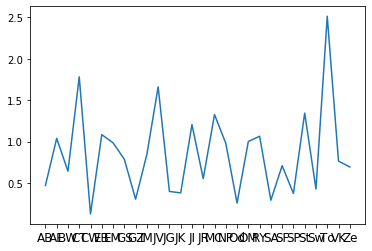

<Figure size 360x720 with 0 Axes>

In [95]:
plt.plot(player_stats_df['Touches'] / player_stats_df['Points played total'])
plt.xticks(range(len(players)),player_inits,fontsize=12)
plt.figure(figsize=(5, 10))

In [18]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#we can combine the passes and possessions dfs 
passes_df.columns.intersection(poss_df.columns)

Index(['Created', 'Point', 'Possession',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent'],
      dtype='object')

In [20]:
full_poss_df.columns

Index(['Created_x', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)_x',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_x',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [21]:
#how many more yards are GAINED on o points than d points
o_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [22]:
#how many more yards are TOTAL THROWN on o points than d points
o_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [28]:
mult_d_total = ((o_dist_total + d_dist_total) / 2) / d_dist_total
mult_o_total = ((o_dist_total + d_dist_total) / 2) / o_dist_total

In [29]:
mult_d_gain = ((o_dist_gain / d_dist_gain) / 2) / d_dist_gain
mult_o_gain = ((o_dist_gain / d_dist_gain) / 2) / o_dist_gain

In [32]:
#find o to d pp ratio
player_stats_df['o_d_pp_ratio'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

In [36]:
o_pp_ratio = player_stats_df.loc[0,'o_d_pp_ratio']

In [64]:
player_stats_df.loc[0,'Total completed throw distance (m)']

132.5

In [45]:
o_pp_ratio * abs(1-mult_d_total)

0.06904091604845636

### OWENS FIGURE INFORMATION

In [ ]:
turnover = np.array(df['Turnover?'])
yards = np.array(df['Forward distance (m)'])

In [ ]:
fig = plt.figure(figsize=(6, 6))
bins = np.arange(-10, 70, 4)
H_turn, bin_edges = np.histogram(yards[np.where(turnover==1)], bins=bins, normed=True)
H_completion, bin_edges = np.histogram(yards[np.where(turnover==0)], bins=bins, normed=True)
plt.bar(bin_edges[:-1], H_completion, width=1)
plt.bar(bin_edges[:-1] + 1, H_turn, width=1)
plt.legend(['Not a turn', 'Mistakes were made'])
#plt.hist(yards[np.where(turnover==1)], bins=20)
fig.savefig(os.path.join(figs_path, 'turn_yardage_hist.pdf'), dpi=300, format='pdf')

In [ ]:
H_completed, bin_edges = np.histogram(yards, bins=bins, weights=(1 - turnover), normed=False)
H_total, bin_edges = np.histogram(yards, bins=bins, normed=False)

In [ ]:
plt.plot(H_completed/H_total)

In [ ]:
completion_pct = H_completed/H_total
completion_ste = (1 - completion_pct) * completion_pct / np.sqrt(H_total)

In [ ]:
fig = plt.figure(figsize=(8, 6))
x = bin_edges[:-5] + 2
pct = completion_pct[:-4]
ste = completion_ste[:-4]
plt.plot(x, pct, '.', color='C0')
plt.plot(x, pct, color='C0')
plt.fill_between(x, pct - ste, pct + ste, color='C0', alpha=0.3)
plt.xlabel('Forward Yards (m)')
plt.ylabel('Completion %')
plt.ylim([0, 1])
fig.savefig(os.path.join(figs_path, 'completion_pct.pdf'), dpi=300, format='pdf')

In [ ]:
H_total